# Tensor Flow

In [1]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

### 1.Constants

In [2]:
a = tf.constant(2)
b = tf.constant(3)
c = a+b
sess=tf.compat.v1.Session()
sess.run(c)

5

In [3]:
a1 = tf.constant([[3,3]])
a2 = tf.constant([[3],[3]])
res = tf.matmul(a1, a2)
sess.run(res)

array([[18]], dtype=int32)

### 2.Session

In [4]:
#session
a = tf.constant(2)
b = tf.constant(3)
c = tf.add(a, b)
#print(c.eval())
with tf.compat.v1.Session() as abc:
    print(c.eval())

5


### 3.Variables

In [5]:
#variables
var1 = tf.Variable(100)
var2 = tf.Variable(3)
sum = tf.add(var1, var2)
sess= tf.compat.v1.Session()
sess.run(tf.compat.v1.global_variables_initializer())
print(sess.run(sum))

assign = var1.assign(1232)#since var1 was supposed to have int32 value so var1 can only assign int value, 32.3 is will give an error
print(sess.run(assign))#assign the 1232 to val1,after you sign the var1 will be 1232
print(sess.run(var1))
print(sess.run(sum))

103
1232
1232
1235


### 4.Placeholder

A way to store data, place a holder first and pass the values later

In [6]:
x = tf.compat.v1.placeholder(tf.int32, shape = (2,3))
y = x * tf.constant(12)
sess.run(y, feed_dict={x:[[1,2,3], [4,5,6]]})

array([[12, 24, 36],
       [48, 60, 72]], dtype=int32)

In [7]:
x = tf.compat.v1.placeholder(tf.int32, shape = (2,3))
y = x * tf.constant(12)
sess.run(y, feed_dict={x:[[1,2,3], [4,5,6]]})

array([[12, 24, 36],
       [48, 60, 72]], dtype=int32)

### 5.MNIST-Tensorflow-Loading-Data

In [8]:
from tensorflow.examples.tutorials.mnist import input_data

In [9]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [10]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x13bc2ec50>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x13bc2ec18>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x13f80ec18>)

In [17]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
mnist.train.labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [11]:
mnist.train.images.shape, mnist.train.labels.shape
#(55000, 784)-->55000,28*28 images

((55000, 784), (55000, 10))

In [12]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [13]:
mnist.test.images.shape, mnist.test.labels.shape

((10000, 784), (10000, 10))

In [14]:
mnist.validation.images.shape

(5000, 784)

In [15]:
import numpy as np
from matplotlib import pyplot as plt

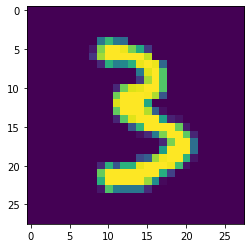

In [16]:
first_image = mnist.train.images[412]
first_image = np.array(first_image, dtype='float')
first_image = first_image.reshape((28,28))
plt.imshow(first_image)
plt.show()

In [21]:
with tf.compat.v1.Session() as sess:
    print(tf.compat.v1.random_normal([784, 256]).eval())

[[ 0.24041301  0.7913767  -0.97522783 ... -0.7638573  -1.329773
  -0.30477455]
 [ 1.2063166  -0.37482876  0.7953951  ... -0.35579705 -0.17926145
   0.93807405]
 [-0.5391431   0.6449488  -1.2304947  ... -1.1675905  -0.41909623
  -0.08218864]
 ...
 [ 1.7139869  -1.7749791  -1.0035893  ...  0.95350146  1.9751807
   0.63999546]
 [ 0.7127785   0.2848057   1.5687326  ... -0.3291408  -0.24408817
   1.3042625 ]
 [ 0.16211024  0.9636418   0.32406998 ... -0.23075381  0.32266748
  -1.3495449 ]]


In [22]:
# weights & biases
n_input = 784
n_hidden_1 = 256
n_hidden_2 = 256
n_classes = 10

weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

biases = {
    'h1': tf.Variable(tf.random_normal([n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [26]:
def forward_propagation(x, weights, biases):
    in_layer1 = tf.add(tf.matmul(x, weights['h1']), biases['h1'])#input
    out_layer1 = tf.nn.relu(in_layer1)#output
    
    in_layer2 = tf.add(tf.matmul(out_layer1, weights['h2']), biases['h2'])
    out_layer2 = tf.nn.relu(in_layer2)
    
    output = tf.add(tf.matmul(out_layer2, weights['out']), biases['out'])
    return output

**Explanation: Having identity activation function on all layers will lead to we learning linear decision boundary. In most problems that would lead to worse results.**

In [48]:
sess = tf.compat.v1.Session()
sess.run(tf.compat.v1.global_variables_initializer())
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder(tf.int32, [None, n_classes])
pred = forward_propagation(x, weights, biases)

In [49]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels = y))

In [50]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
optimize = optimizer.minimize(cost)

In [62]:
sess = tf.compat.v1.Session()
sess.run(tf.compat.v1.global_variables_initializer())

In [60]:
for i in range(50):
    c, _ = sess.run([cost,optimize], feed_dict={x:mnist.train.images , y:mnist.train.labels})
    print(c)

65.48421
62.825104
60.26448
58.085526
56.37529
55.105064
54.073856
53.0318
51.791237
50.337536
48.771835
47.2487
45.882908
44.7298
43.743988
42.879097
42.06135
41.225826
40.340195
39.413914
38.483006
37.589104
36.785236
36.081406
35.454163
34.862453
34.2739
33.670383
33.046597
32.419785
31.818644
31.265068
30.758331
30.279387
29.815794
29.353178
28.884773
28.408941
27.938877
27.48689
27.060293
26.655478
26.268888
25.894764
25.52516
25.156013
24.79053
24.430298
24.078068
23.738457


In [61]:
predictions = tf.argmax(pred, 1)
correct_labels = tf.argmax(y, 1)
correct_predictions = tf.equal(predictions, correct_labels)
predictions,correct_predictions  = sess.run([predictions, correct_predictions], feed_dict={x:mnist.test.images,
                                              y:mnist.test.labels})
correct_predictions.sum()

9064

In [ ]:
#batch gradient descent
batch_size=100
for i in range(25):
    num_batches=int(mnist.train.num_examples/batch_size)
    total_cost=0
    for j in range(num_batches):
        batch_x,batch_y=mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost,optimize], feed_dict={x:mnist.train.images , y:mnist.train.labels})
        total_cost+=c
    print(total_cost)

In [ ]:
predictions = tf.argmax(pred, 1)
correct_labels = tf.argmax(y, 1)
correct_predictions = tf.equal(predictions, correct_labels)
predictions,correct_predictions  = sess.run([predictions, correct_predictions], feed_dict={x:mnist.test.images,
                                              y:mnist.test.labels})
correct_predictions.sum()